In [1]:
from piblin.dataio import read_file, read_directory
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
import matplotlib.pyplot as plt 

In [2]:
import os

# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath = os.path.join(current_dir, 'tutorial_data', 'tutorial_3', 'owchirp_tts.txt')

In [3]:
experiment = read_file(filepath, create_composite_datasets=True)
pipeline = RheoAnalysis() 

processed_experiment = pipeline(experiment)
print(processed_experiment)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 20

Varied Conditions
-----------------
method

index	n_rep	method	Data Types	Data Types	Data Types	
0	1	Step name	Arbitrary Wave - 1	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(temperature[°C]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
1	1	Step name	Arbitrary Wave - 2	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(temperature[°C]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
2	1	Step name	Arbitrary Wave - 3	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(temperature[°C]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
3	1	Step name	Arbitrary Wave - 4	storage modulus(Pa)=f(angular frequency[rad/s]) (156 points)	velocity(rad/s)=f(temperature[°C]) (7499 points)	strain filtered masked(a.u)=f(time masked[s]) (7000 points)	
4	1	Step name	A

The processed experiment object now contains three datasets. This is because the data from the rheometers were collected in the transient state (time domain). To extract the necessary viscoelastic properties, a Fourier transform of the stress and strain is required, converting the data into the frequency domain. The first dataset contains the rheological properties as a function of frequency.

In [4]:
processed_experiment.datasets[0][0]

OneDimensionalCompositeDataset(dependent_variable_data=[+2.7446e+08 +2.4528e+08 ... +2.5273e+08 +2.3100e+08], dependent_variable_names=['storage modulus'], dependent_variable_units=['Pa'], independent_variable_data=[array([ +0.3835,  +0.7670, ..., +59.4418, +59.8253])], independent_variable_names=['angular frequency'], independent_variable_units=['rad/s'], source=Dataset in frequency space)

The other variables availble in the dataset

In [5]:
processed_experiment.datasets[0][0].data_array_names

['angular frequency',
 'fourier_transform_strain',
 'fourier_transform_stress',
 'storage modulus',
 'loss modulus',
 'complex modulus',
 'frequency_hz',
 'tan(delta)',
 'complex viscosity']

This dataset contain many useful details concerning the nature of the OWChirp used. These details can be accessed trhough the following dictionary

In [6]:
display(processed_experiment[0][0].details)

{'Arbitrary Wave - 1': {'rate (pts/s)': 500,
  'wave 1': {'coef': [0.0], 'duration (s)': 1.0, 'wave form': '0'},
  'wave 2': {'coef': [8.5e-05, 2.244, 3.8148, 0.5428, 0.3785, 0.7926, 1.3963],
   'duration (s)': 0.7,
   'wave form': '0.000085*cos(2.244*t -3.8148)^2*sin(0.5428*exp(0.3785*t)-0.7926-1.3963)'},
  'wave 3': {'coef': [8.5e-05, 0.5428, 0.3785, 0.7926, 1.3963],
   'duration (s)': 12.6,
   'wave form': '0.000085*sin(0.5428*exp(0.3785*t)-0.7926-1.3963)'},
  'wave 4': {'coef': [8.5e-05, 2.244, 32.0891, 0.5428, 0.3785, 0.7926, 1.3963],
   'duration (s)': 0.7,
   'wave form': '0.000085*cos(2.244*t -32.0891)^2*sin(0.5428*exp(0.3785*t)-0.7926-1.3963)'}},
 'Arbitrary Wave - 2': {'rate (pts/s)': 500,
  'wave 1': {'coef': [0.0], 'duration (s)': 1.0, 'wave form': '0'},
  'wave 2': {'coef': [0.0001, 2.244, 3.8148, 0.5428, 0.3785, 0.7926, 1.3963],
   'duration (s)': 0.7,
   'wave form': '0.0001*cos(2.244*t -3.8148)^2*sin(0.5428*exp(0.3785*t)-0.7926-1.3963)'},
  'wave 3': {'coef': [0.0001, 0

The second dataset is the original data generated by the instrument in transient mode (time domain), with strain and stress values corrected for bias.

In [7]:
print(processed_experiment.datasets[0][1])
processed_experiment.datasets[0][1].data_array_names

OneDimensionalCompositeDataset
------------------------------
Dataset Source: 

Dependent Variable Data Properties: ndim=1, size=7499 (7499 bytes), shape=(7499,)
Dependent Variable Labels: velocity(rad/s)

Independent Variable Data Properties: n=1, lengths=[7499]
Independent Variable Labels: temperature(°C)

Values of velocity (rad/s) as a function of temperature (°C)

temperature = [-39.9710 -39.9710 ... -39.9700 -39.9700]
velocity    = [+0.0002 +0.0003 ... +0.0000 +0.0000]


['temperature',
 'velocity',
 'strain',
 'stress',
 'time',
 'compliance',
 'modulus',
 'displacement',
 'shear rate',
 'step time',
 'axial force',
 'gap',
 'Temperature',
 'time_cut',
 'strain filtered',
 'stress filtered',
 'strain rate']

The thirs dataset is a dataset containnig time, stress and strain but without waiting time present

In [8]:
processed_experiment.datasets[0][2]

OneDimensionalCompositeDataset(dependent_variable_data=[+0.0000 +0.0000 ... +0.0000 +0.0000], dependent_variable_names=['strain filtered masked'], dependent_variable_units=['a.u'], independent_variable_data=[array([ +1.0003,  +1.0023, ..., +14.9963, +14.9984])], independent_variable_names=['time masked'], independent_variable_units=['s'], source=Dataset in time space)

A useful way to analyze and visualize these type of experiments is given below

In [9]:
import copy

# Initialize lists to store the extracted data
data_dict = {
    "angular_frequencies": [],
    "storage_moduli": [],
    "loss_moduli": [],
    "complex_moduli": [],
    "complex_viscosities": [],
    "phase_angles": [],
    "step_times": [],
    "strains": [],
    "stresses": [],
    "temperatures": []
}

# Number of steps 
steps = len(processed_experiment)

# Process each experiment to extract data
for step in range(steps):
    dataset_frequency = processed_experiment[step][0].datasets[0]

    # Extract frequency domain data
    data_dict["angular_frequencies"].append(copy.deepcopy(dataset_frequency.x_values))
    data_dict["storage_moduli"].append(copy.deepcopy(dataset_frequency.y_values))

    dataset_frequency.switch_coordinates('loss modulus', 'complex modulus')
    data_dict["loss_moduli"].append(copy.deepcopy(dataset_frequency.x_values))
    data_dict["complex_moduli"].append(copy.deepcopy(dataset_frequency.y_values))

    dataset_frequency.switch_coordinates('complex viscosity', 'tan(delta)')
    data_dict["complex_viscosities"].append(copy.deepcopy(dataset_frequency.x_values))
    data_dict["phase_angles"].append(copy.deepcopy(dataset_frequency.y_values))

    # Extract time domain data
    dataset_time = processed_experiment[step][0].datasets[1]
    dataset_time.switch_coordinates('time_cut', 'strain filtered')
    data_dict["step_times"].append(copy.deepcopy(dataset_time.x_values))
    data_dict["strains"].append(copy.deepcopy(dataset_time.y_values))

    dataset_time.switch_coordinates('temperature', 'stress filtered')
    data_dict["temperatures"].append(copy.deepcopy(dataset_time.x_values))
    data_dict["stresses"].append(copy.deepcopy(dataset_time.y_values))

In [10]:
import os

# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Specify where to save the file and name of the file
output_dir_path = os.path.join(current_dir, 'tutorial_data', 'tutorial_3', 'plots')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create output directory if it doesn't exist
if not os.path.exists(output_dir_path):
    os.makedirs(output_dir_path)

# Function to visualize and save plots
def plot_experiment_data(step, data_dict):
    f = data_dict["angular_frequencies"][step]
    stor = data_dict["storage_moduli"][step]
    loss = data_dict["loss_moduli"][step]
    complex_mod = data_dict["complex_moduli"][step]  # Assuming complex_moduli is prepared similarly to stor and loss
    time = data_dict["step_times"][step]
    strain = data_dict["strains"][step]
    stress = data_dict["stresses"][step]
    average_temperature = np.average(data_dict["temperatures"][step])
    title = f"Arbitrary Wave {step + 1}, Temperature = {average_temperature:.2f} °C"

    # Create a custom GridSpec layout for the plots
    fig = plt.figure(figsize=(12, 5))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 2])

    # Moduli plot (left)
    ax1 = plt.subplot(gs[:, 0])
    ax1.plot(f, stor, marker='s', label=r"$G'$", color='red', markersize=10, linestyle='-')
    ax1.plot(f, loss, marker='^', label=r"$G''$", color='blue', markersize=10, markerfacecolor='none', linestyle='--')
    ax1.set_title(title, fontsize=15)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r'$\omega$ (rad/s)', fontsize=20)
    ax1.set_ylabel(r"$G'$, $G''$ (Pa)", fontsize=20)
    ax1.legend(loc='best', frameon=False, prop={'size': 15}, ncol=1, fontsize=15)
    ax1.set_ylim(1e3, 5e8)  # Setting y-axis limits for moduli

    # Time vs strain plot (top right)
    ax3 = plt.subplot(gs[0, 1])
    ax3.plot(time, strain, linewidth=2, color='seagreen')
    ax3.set_xlabel('Time (s)', fontsize=16)
    ax3.set_ylabel('Strain', fontsize=16)
    ax3.axhline(0, color='black', linestyle='--', linewidth=1)  # Dashed line at y=0

    # Time vs stress plot (bottom right)
    ax4 = plt.subplot(gs[1, 1])
    ax4.plot(time, stress, linewidth=2, color='darkorange')
    ax4.set_xlabel('Time (s)', fontsize=16)
    ax4.set_ylabel('Stress (Pa)', fontsize=16)
    ax4.axhline(0, color='black', linestyle='--', linewidth=1)  # Dashed line at y=0

    plt.tight_layout()

    # Save the plot as a PNG file
    plot_filename = os.path.join(output_dir_path, f"plot_{step + 1}.png")
    plt.savefig(plot_filename, dpi=100)
    #plt.close()  # Close the figure to avoid displaying it

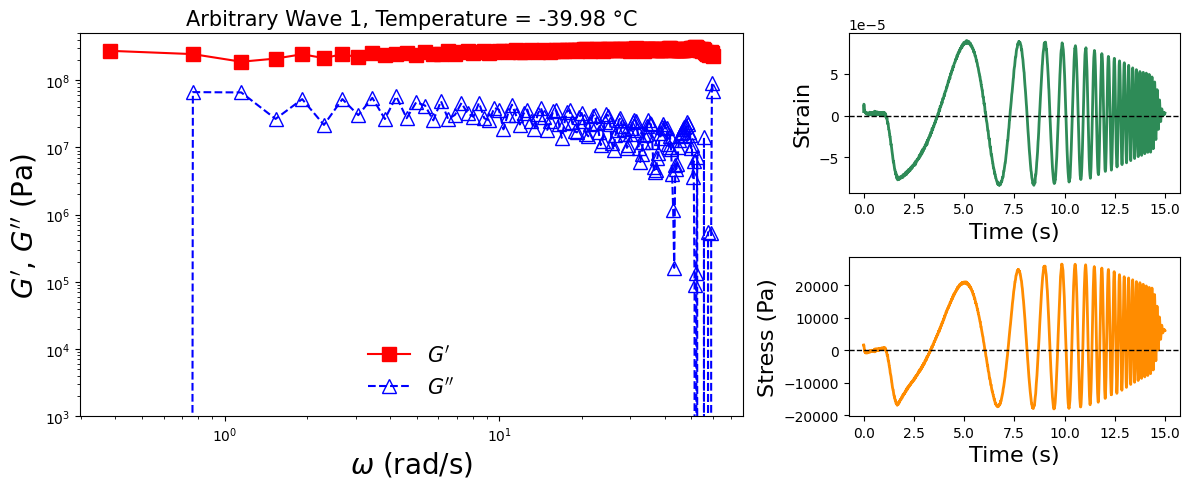

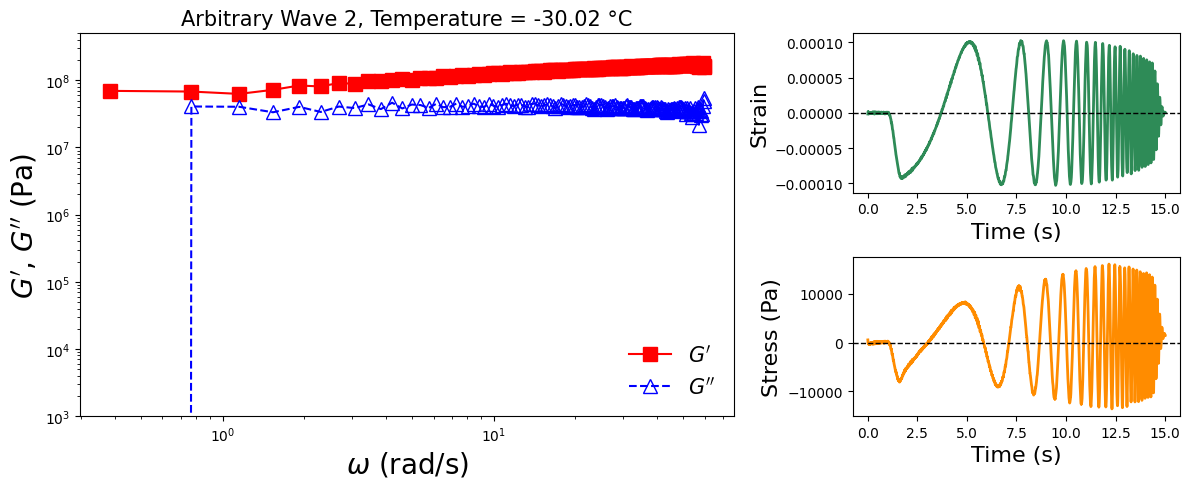

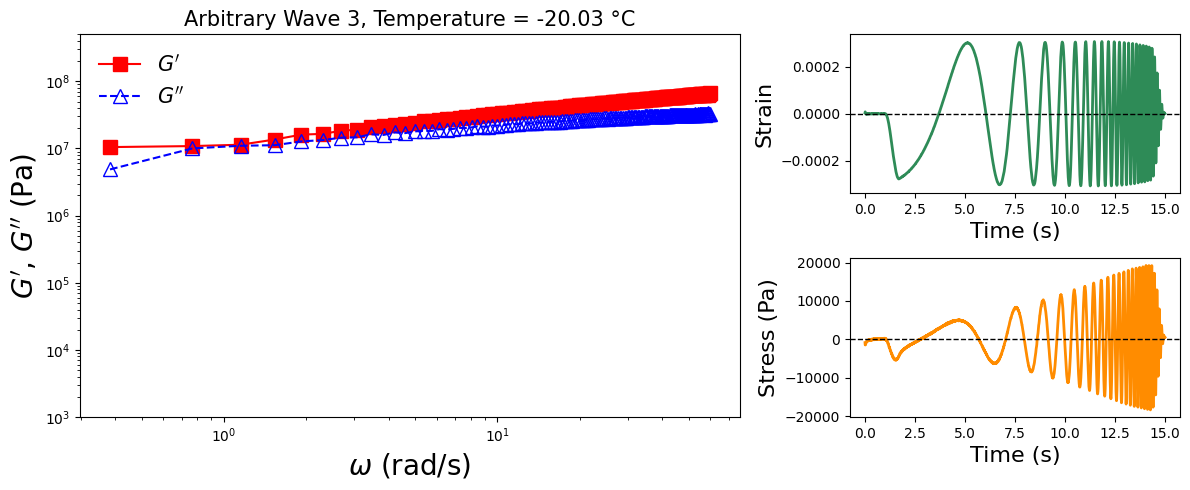

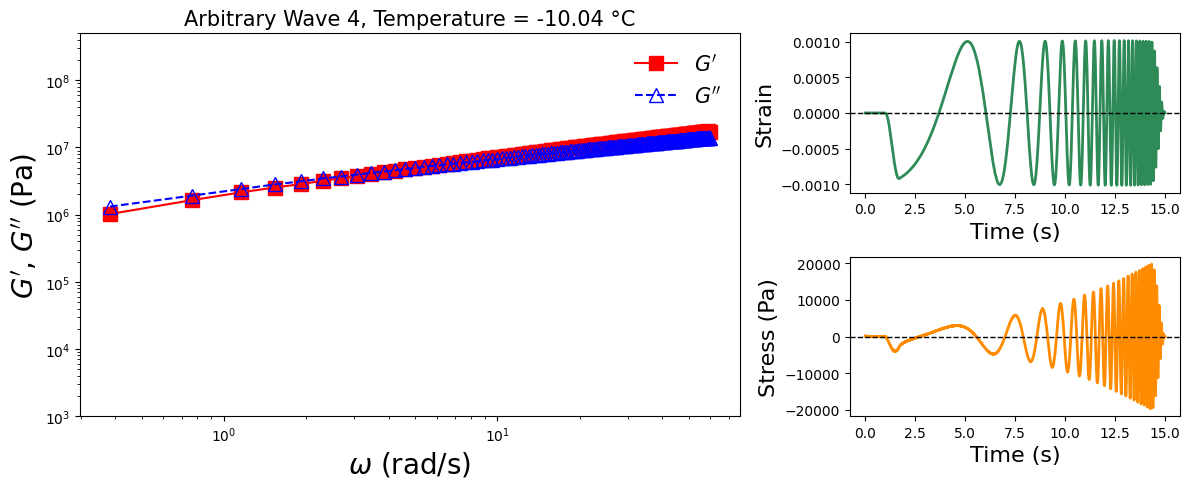

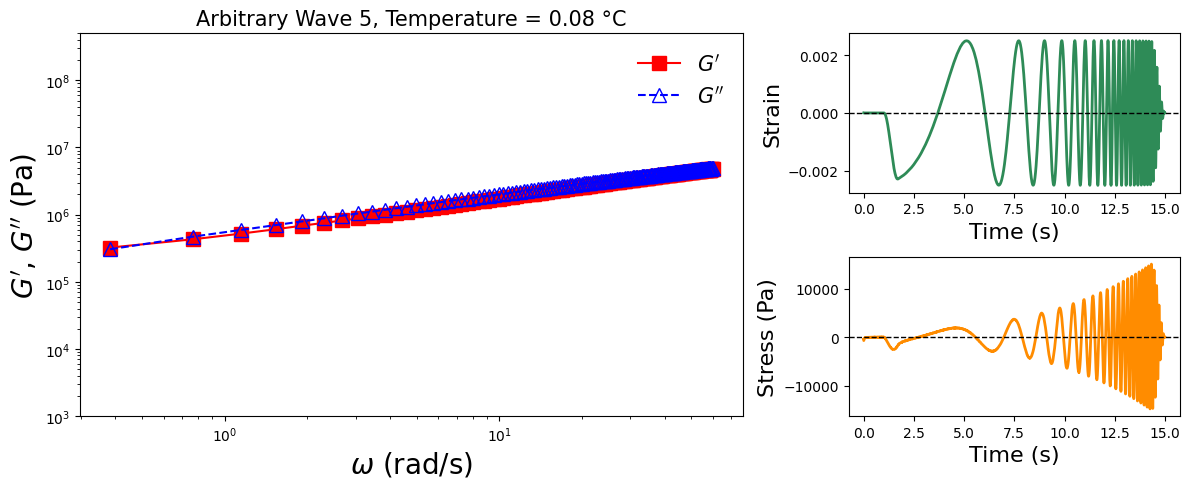

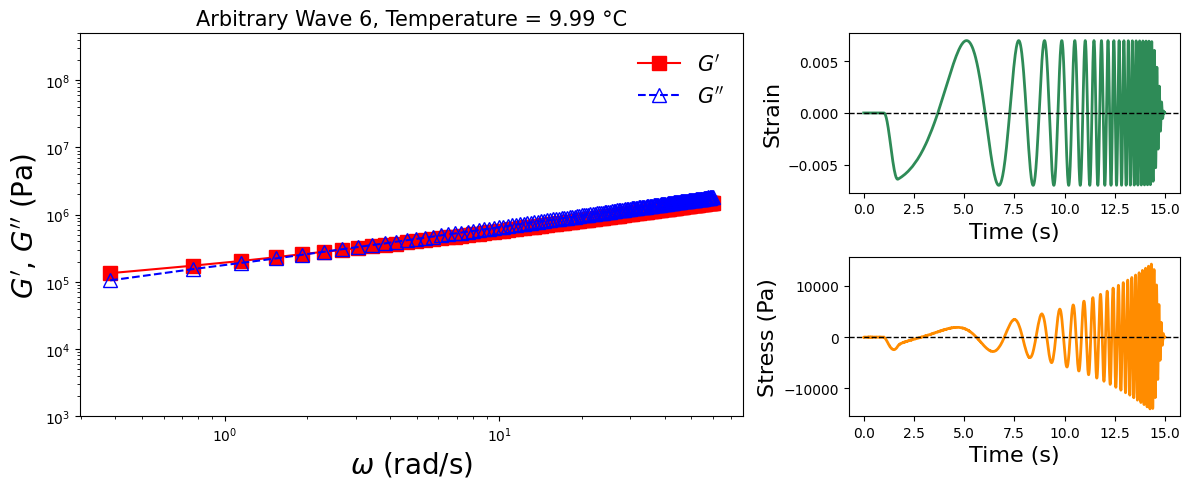

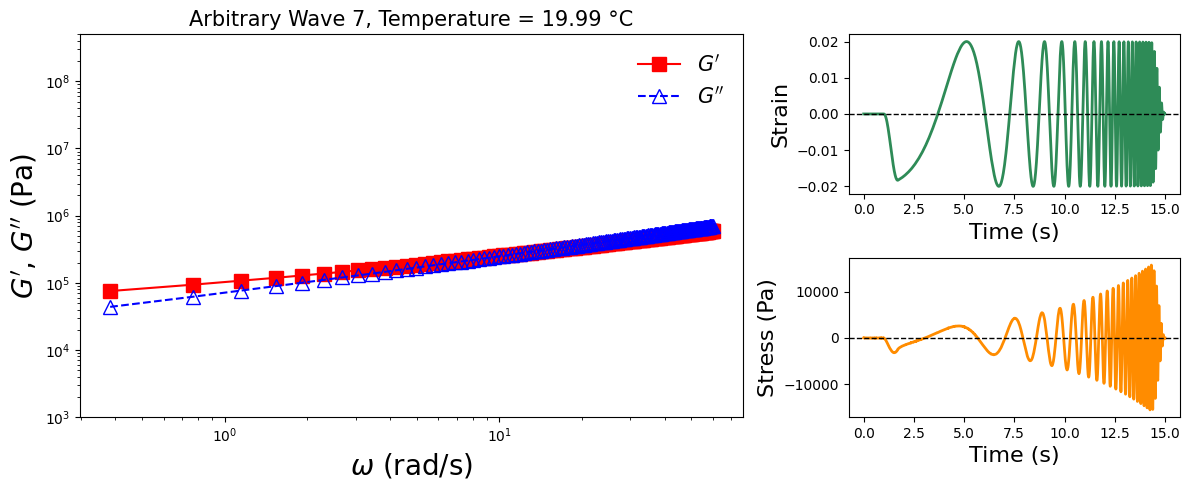

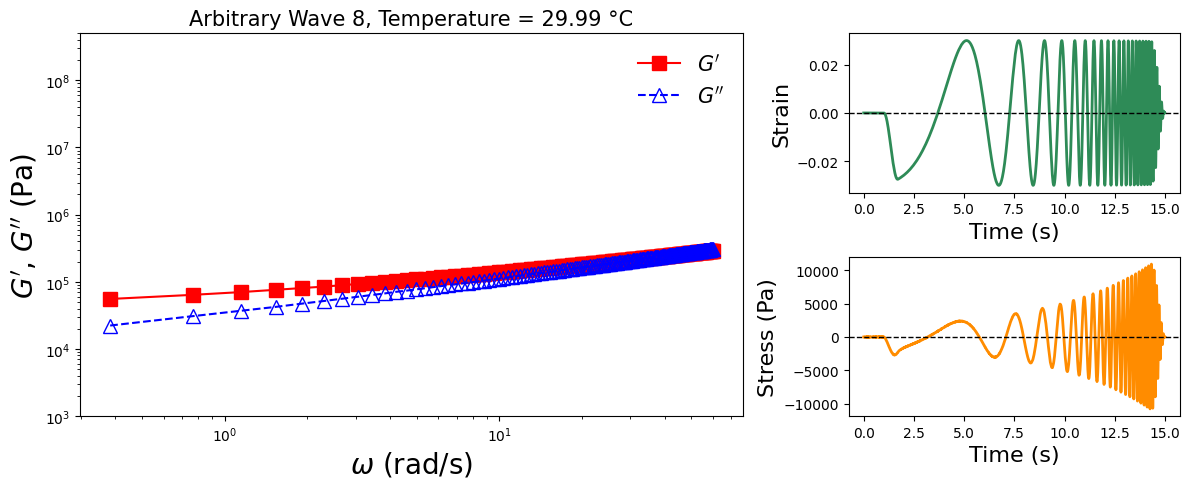

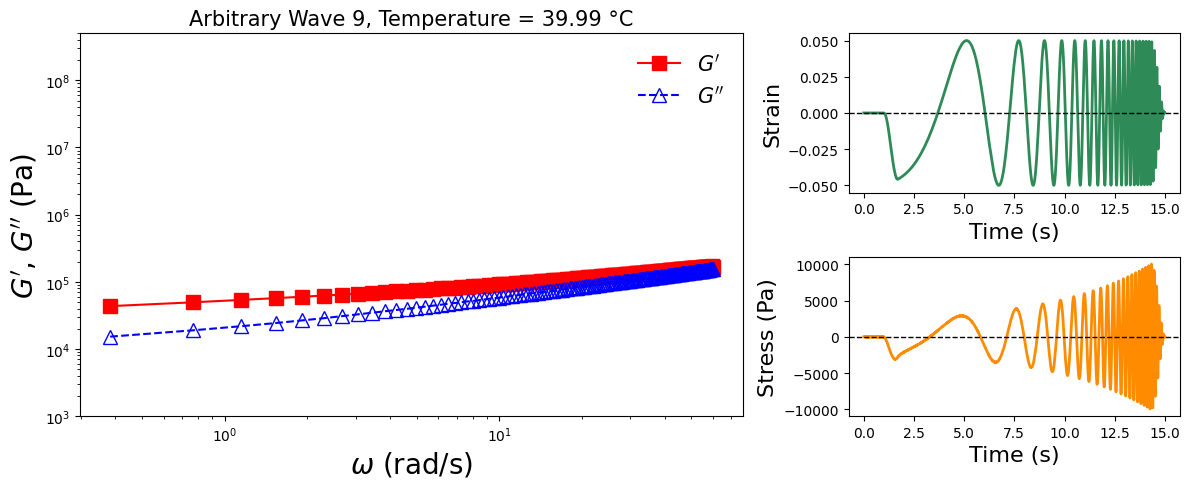

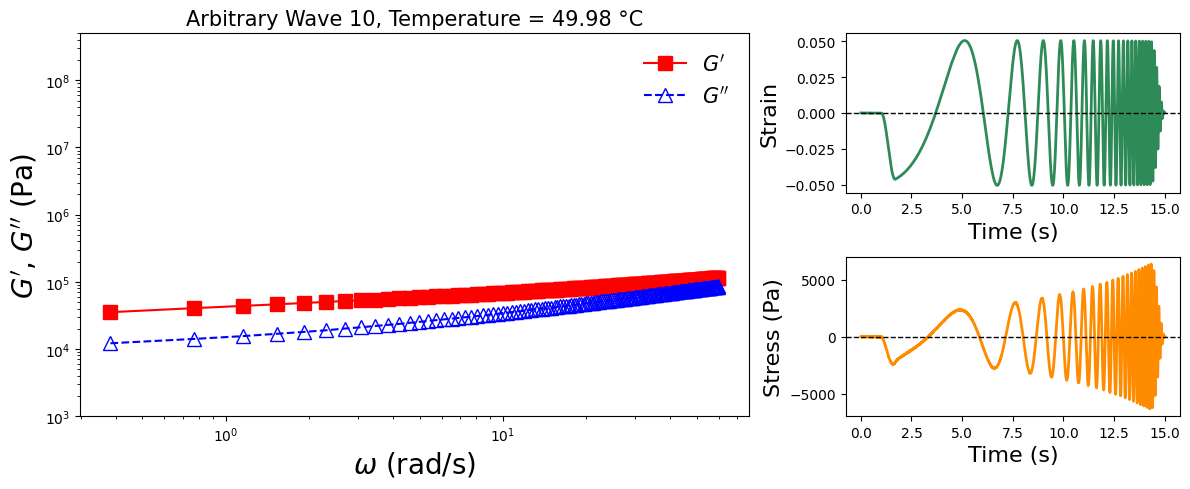

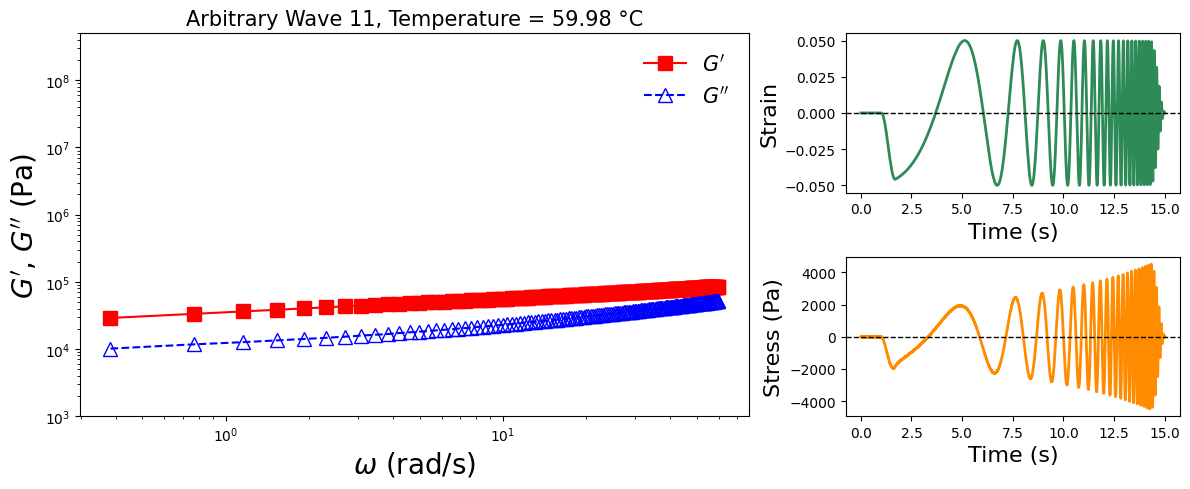

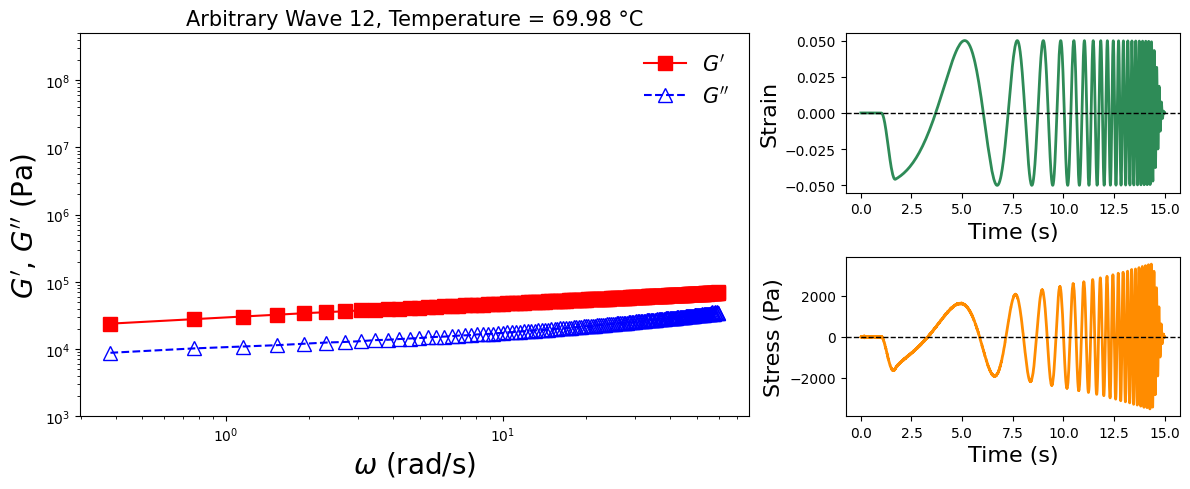

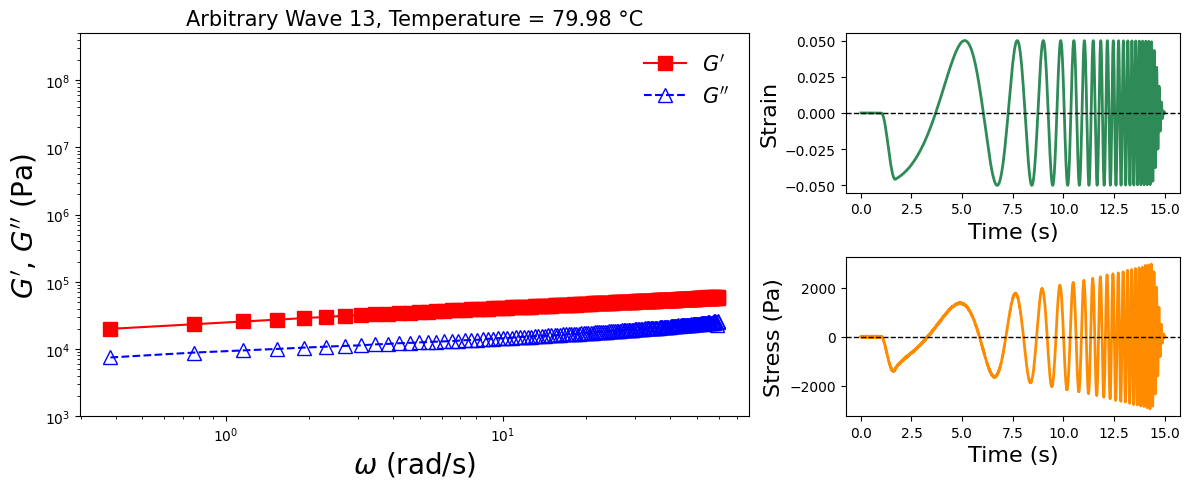

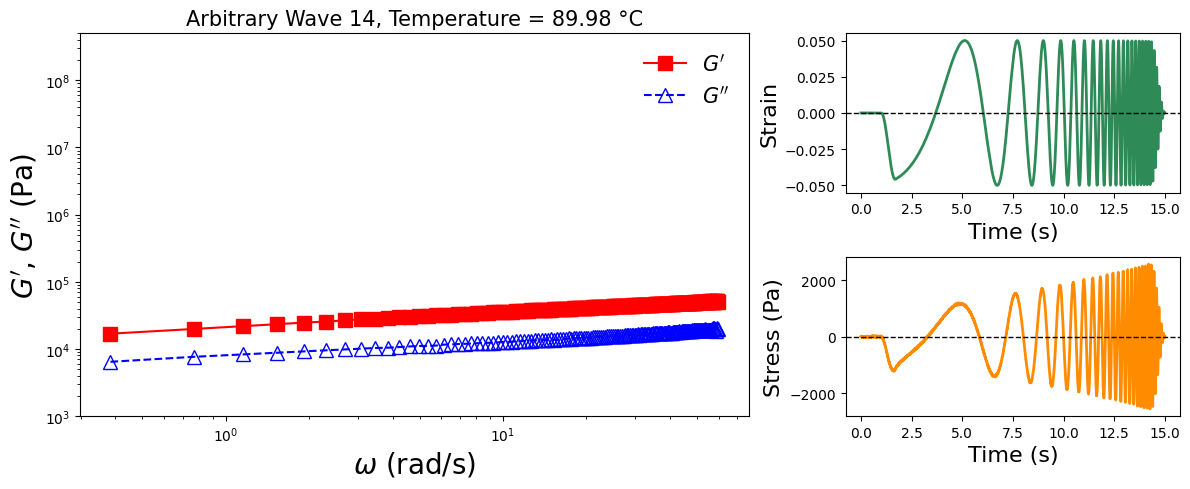

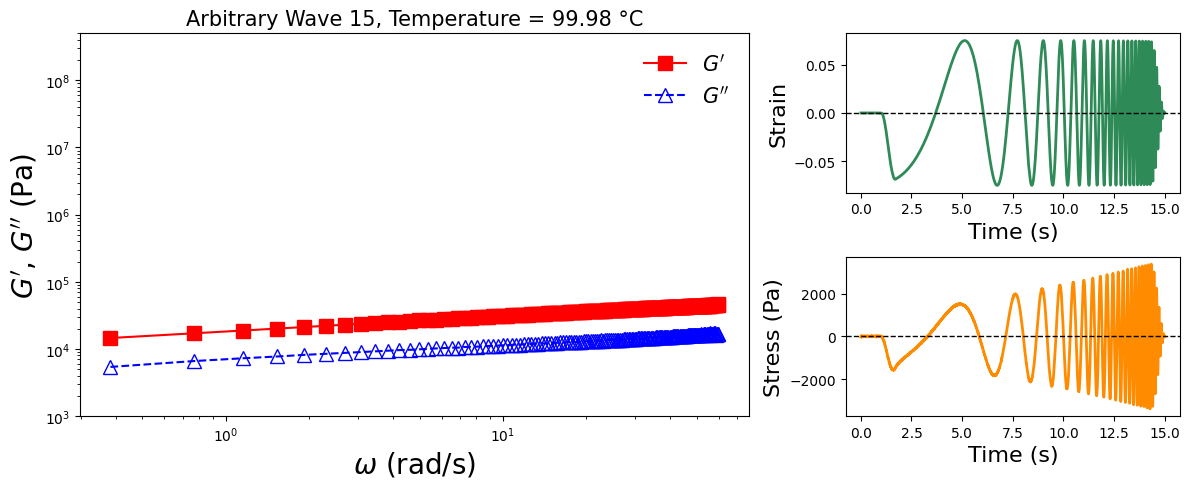

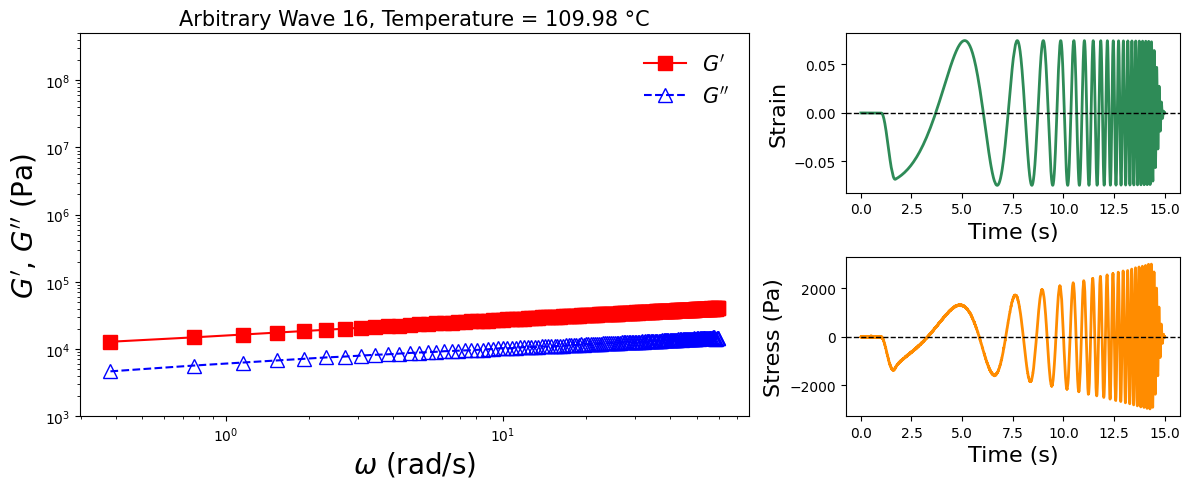

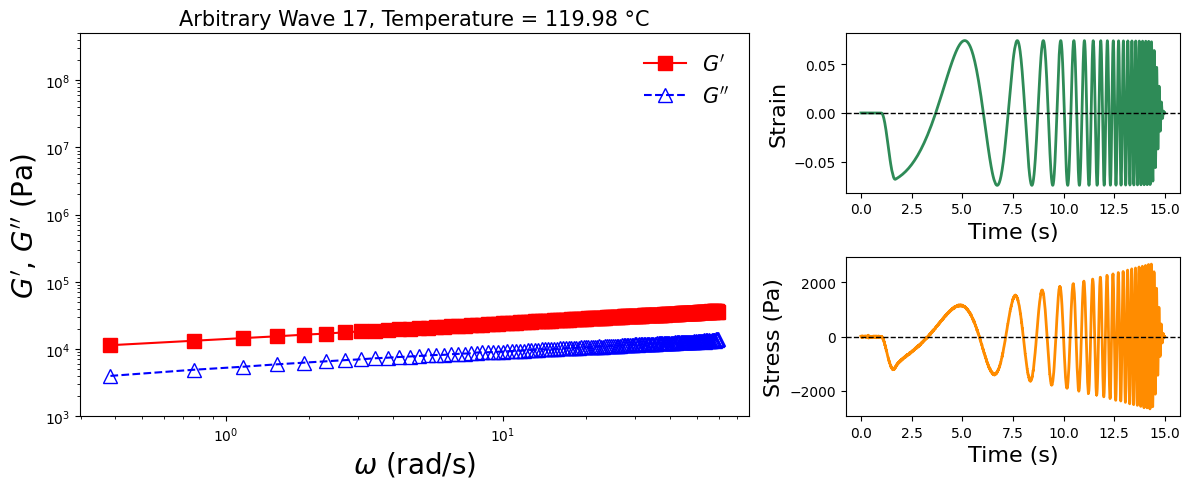

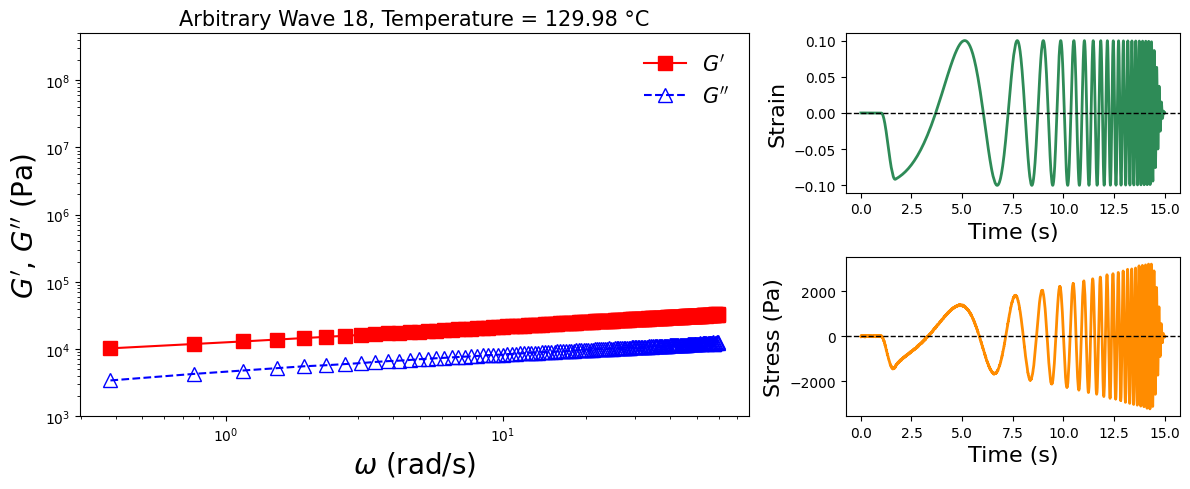

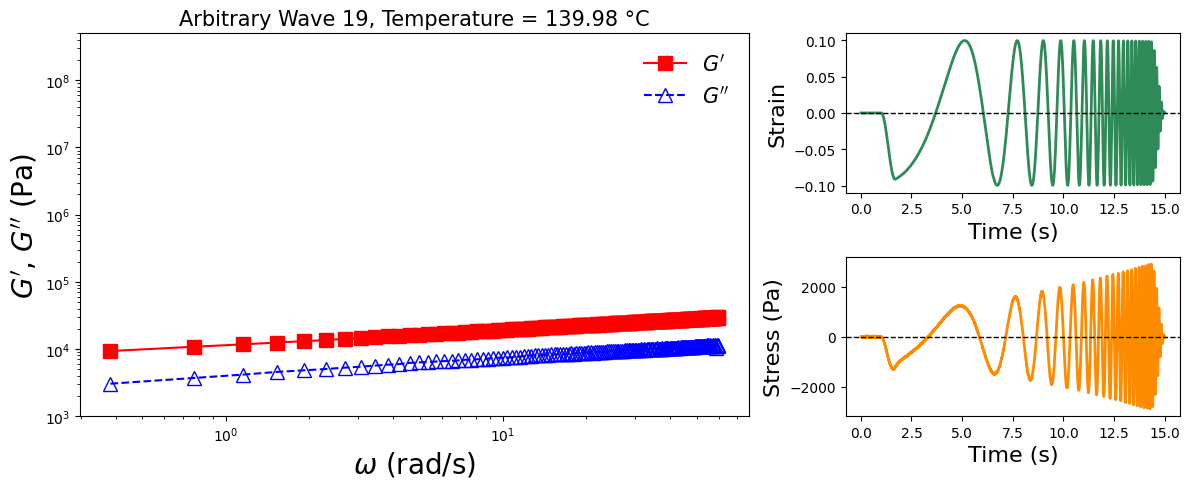

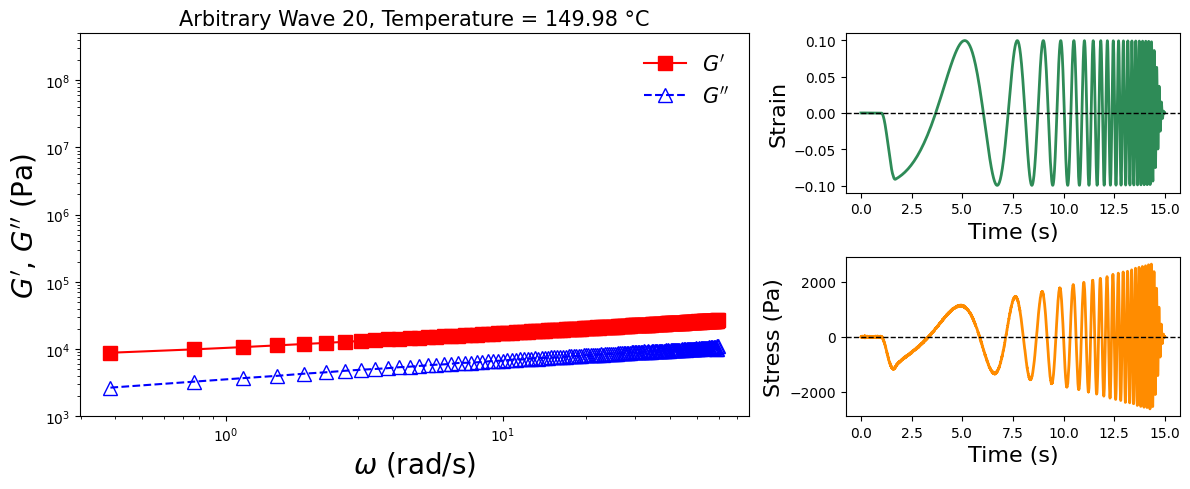

In [12]:
# Plot and save data for each experiment
for step in range(steps):
    plot_experiment_data(step, data_dict)

Animation of the moduli, stress, and strain evolution over experiment time can also be generated

In [13]:
import cv2
import os

# Directory containing the saved PNG plots
output_dir = output_dir_path

# Get the list of image files and sort them by step number
image_files = sorted([img for img in os.listdir(output_dir) if img.endswith(".png")], key=lambda x: int(x.split('_')[1].split('.')[0]))

# Define the codec and create a VideoWriter object
frame = cv2.imread(os.path.join(output_dir, image_files[0]))
height, width, layers = frame.shape
video_filename = os.path.join(output_dir, 'plot_video.avi')  # Save the video in output_dir
fps = 2  # 2 frames per second to speed up the video
video = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'DIVX'), fps, (width, height))

# Write each image to the video in sorted order
for image in image_files:
    img_path = os.path.join(output_dir, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Release the video writer object
video.release()

print(f"Video saved as {video_filename}")

Video saved as D:\codes\hermes\tutorial_notebooks\tutorial_data\tutorial_3\plots\plot_video.avi


Stress and strain signal in the fourier domain can also be analyzed for each arbitrary wave

In [14]:
#Choose the step to analyze
step = 10

#Extract wave data from frquency space)
aw1_fft = processed_experiment[step][0].datasets[0]
aw1_fft.switch_coordinates('angular frequency', 'fourier_transform_strain')
f = copy.deepcopy(aw1_fft.x_values)
strain = copy.deepcopy(aw1_fft.y_values)
aw1_fft.switch_coordinates('angular frequency', 'fourier_transform_stress')
stress = copy.deepcopy(aw1_fft.y_values)

#Extract wave data from time space
original_aw1 = processed_experiment[step][0].datasets[1]
original_aw1.switch_coordinates('step time', 'strain filtered')
time = copy.deepcopy(original_aw1.x_values)
original_strain = copy.deepcopy(original_aw1.y_values)
original_aw1.switch_coordinates('step time', 'stress filtered')
original_stress = copy.deepcopy(original_aw1.y_values)

real_strain = np.real(strain)
real_stress = np.real(stress)
img_strain = np.imag(strain)
img_stress = np.imag(stress)
abs_strain = np.abs(strain)
abs_stress = np.abs(stress)

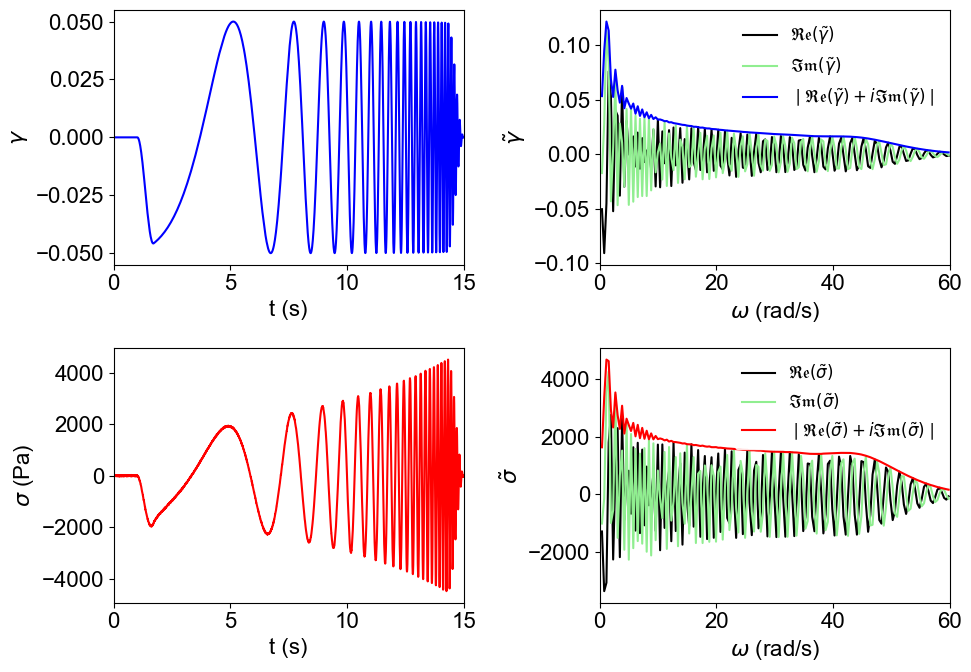

In [15]:
# Creating a 2x2 plot
# Setting the font to Arial globally
plt.rcParams.update({'font.family': 'arial', 'font.size': 16})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 7))

# Color definitions
strain_color = 'blue'
stress_color = 'red'
real_color_strain = 'black'
img_color_strain = 'lightgreen'
real_color_stress = 'black'
img_color_stress = 'lightgreen'

# Top-left plot: Original Strain vs Time
ax1.plot(time, original_strain, strain_color, label='Original Strain')
#ax1.set_title('Strain vs Time')
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\gamma$')
ax1.set_xlim(0, 15)
#ax1.grid(True)

# Top-right plot: Real, Imaginary, and Absolute Strain vs Frequency
ax2.plot(f, real_strain, real_color_strain, label='$\mathfrak{Re}(\\tilde\gamma)$')
ax2.plot(f, img_strain, img_color_strain, label='$\mathfrak{Im}(\\tilde\gamma)$')
ax2.plot(f, abs_strain, 'blue', label='$\mid\mathfrak{Re} (\\tilde\gamma) + i\mathfrak{Im}(\\tilde\gamma)\mid$')  # Purple as a mix of blue and green
#ax2.set_title('Strain vs Frequency')
ax2.set_xlabel('$\omega$ (rad/s)')
ax2.set_ylabel(r'$\tilde\gamma$')
ax2.set_xlim(0, 60)
#ax2.grid(True)
legend2 = ax2.legend(fontsize=12)
legend2.get_frame().set_edgecolor('white')

# Bottom-left plot: Original Stress vs Time
ax3.plot(time, original_stress, stress_color, label='Original Stress')
ax3.set_xlabel('t (s)')
ax3.set_ylabel(r'$\sigma$ (Pa)')
ax3.set_xlim(0, 15)
#ax3.grid(True)

# Bottom-right plot: Real, Imaginary, and Absolute Stress vs Frequency
ax4.plot(f, real_stress, real_color_stress, label='$\mathfrak{Re}(\\tilde\sigma)$')
ax4.plot(f, img_stress, img_color_stress, label='$\mathfrak{Im}(\\tilde\sigma)$')
ax4.plot(f, abs_stress, 'red', label='$\mid\mathfrak{Re} (\\tilde\sigma) + i\mathfrak{Im}(\\tilde\sigma)\mid$')  # Gold as a distinct mix
#ax4.set_title('Stress vs Frequency')
ax4.set_xlabel('$\omega$ (rad/s)')
ax4.set_ylabel(r'$\tilde\sigma$')
ax4.set_xlim(0, 60)
#ax4.grid(True)
legend4 = ax4.legend(fontsize=12)
legend4.get_frame().set_edgecolor('white')

plt.tight_layout()
plt.show()
